<a href="https://colab.research.google.com/github/JayasreeThyadi/SIH23-AYUR-BHARATH/blob/main/code/SIH_Dredger_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import preprocessing


In [ ]:
from google.colab import files
uplo = files.upload()

Saving records.xlsx to records (5).xlsx


In [ ]:
df = pd.read_excel("records (5).xlsx")

In [ ]:
df.head()

,LOCATION,YEAR,MONTH,RAINFALL,DEPTH,AVAILABLE DREDGER,CAPACITY,RAINFALL<300,RAINFALL>300,DECISION,DREDGER USED,DREDGER AMOUNT
0,COCHIN,2021,JAN,22,2.90,8.0,6500.0,1.0,0,8.0,15.0,1315497.55
1,COCHIN,2021,JAN,22,2.90,19.0,5500.0,0.0,0,8.0,15.0,1315497.55
2,COCHIN,2021,JAN,22,2.90,15.0,4500.0,1.0,0,8.0,15.0,1315497.55
3,COCHIN,2021,FEB,27,2.85,15.0,4500.0,1.0,0,20.0,15.0,1300574.55
4,COCHIN,2021,FEB,27,2.85,19.0,5500.0,0.0,0,20.0,15.0,1300574.55


In [ ]:
df=df.dropna(axis=0, inplace=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314 entries, 0 to 328
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LOCATION           314 non-null    object 
 1   YEAR               314 non-null    int64  
 2   MONTH              314 non-null    object 
 3   RAINFALL           314 non-null    int64  
 4   DEPTH              314 non-null    float64
 5   AVAILABLE DREDGER  314 non-null    float64
 6   CAPACITY           314 non-null    float64
 7   RAINFALL<300       314 non-null    float64
 8   RAINFALL>300       314 non-null    int64  
 9   DECISION           314 non-null    float64
 10  DREDGER USED       314 non-null    float64
 11  DREDGER AMOUNT     314 non-null    float64
dtypes: float64(7), int64(3), object(2)
memory usage: 31.9+ KB


In [ ]:
# Define Features and Target
X = df[['LOCATION', 'MONTH', 'RAINFALL', 'DEPTH', 'AVAILABLE DREDGER','CAPACITY','DREDGER AMOUNT']]
y = df['DECISION']


In [ ]:
X

,LOCATION,MONTH,RAINFALL,DEPTH,AVAILABLE DREDGER,CAPACITY,DREDGER AMOUNT
0,0,5,22,2.90,8.0,6500.0,1315497.55
1,0,5,22,2.90,19.0,5500.0,1315497.55
2,0,5,22,2.90,15.0,4500.0,1315497.55
3,0,4,27,2.85,15.0,4500.0,1300574.55
4,0,4,27,2.85,19.0,5500.0,1300574.55
...,...,...,...,...,...,...,...
324,0,11,169,2.65,19.0,5500.0,1012903.00
325,0,11,169,2.65,11.0,4500.0,1012903.00
326,0,3,56,2.67,8.0,6500.0,1117661.00
327,0,3,56,2.67,15.0,7400.0,1117661.00


In [ ]:
le = preprocessing.LabelEncoder()
df['MONTH']=le.fit_transform(df['MONTH'])
df['LOCATION']=le.fit_transform(df['LOCATION'])

In [ ]:
# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Build Decision Tree Model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make Predictions
y_pred = clf.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9603174603174603
Classification Report:
              precision    recall  f1-score   support

         8.0       0.88      0.92      0.90        25
        11.0       1.00      1.00      1.00         6
        15.0       1.00      1.00      1.00        45
        16.0       1.00      1.00      1.00         7
        19.0       1.00      1.00      1.00         6
        20.0       0.94      0.92      0.93        37

    accuracy                           0.96       126
   macro avg       0.97      0.97      0.97       126
weighted avg       0.96      0.96      0.96       126



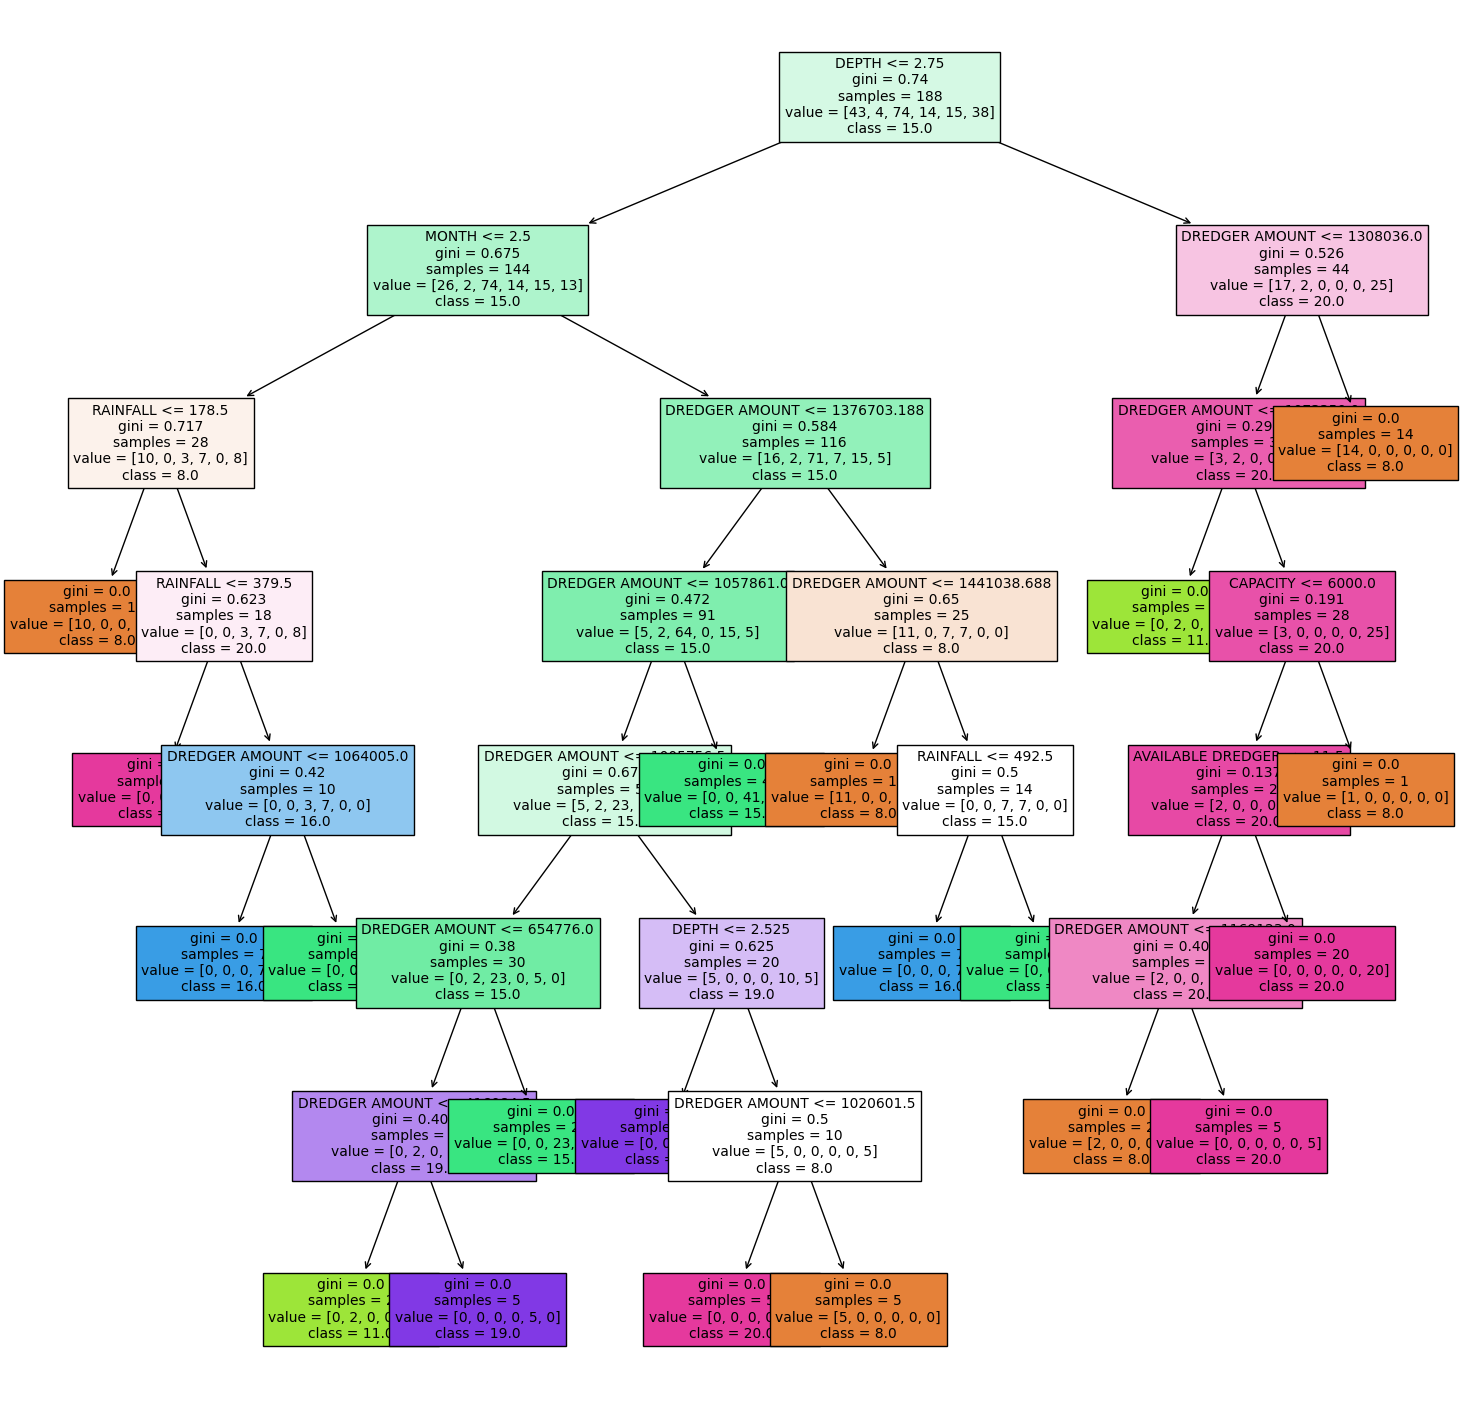

In [ ]:

# Visualize the Decision Tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 18))
plot_tree(clf, fontsize=10, filled=True, feature_names=X.columns, class_names=list(map(str, clf.classes_)))
plt.show()

In [ ]:
print(y_pred)

[19  8 20 15 11 19 19 20 15  8  8  8  8 15 15 19  8 15 15 20 15 15 11 15
  8 19 20  8 15 20 15 19  8 15 15 11 20 20 15 20 20 15 15]


In [ ]:
print(y_train)

56     15
34     20
7      15
43     20
66     19
       ..
71     20
14     15
92     15
51     16
102    19
Name: DECISION, Length: 63, dtype: int64


In [ ]:
print(clf.predict([[0,	5,	22,	2.90,	8.0,	6500.0,	1315497.55]]))

[8.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import pickle

In [ ]:
with open('DTreeClassifier.pkl','wb') as file:
  pickle.dump(clf, file)